In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
x = data['YearsExperience'].values
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [9]:
y = data['Salary'].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [10]:
x.shape

(30,)

In [11]:
x = x.reshape(len(x),1)
x.shape

(30, 1)

In [12]:
### Dividing the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=200)

In [13]:
xtrain

array([[ 4.1],
       [ 6. ],
       [ 7.1],
       [ 3.2],
       [ 2.9],
       [ 9.6],
       [ 5.3],
       [10.3],
       [ 6.8],
       [ 2. ],
       [ 3.2],
       [ 1.3],
       [ 9. ],
       [ 3. ],
       [ 4. ],
       [ 4.5],
       [ 4.9],
       [ 4. ],
       [ 8.2],
       [ 3.9],
       [ 2.2],
       [ 5.1],
       [ 3.7],
       [ 9.5]])

In [14]:
xtest

array([[ 8.7],
       [10.5],
       [ 1.5],
       [ 7.9],
       [ 1.1],
       [ 5.9]])

In [15]:
### Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
### Train the model
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
### Prediction
ypred = model.predict(xtest)
ypred

array([108335.56338618, 125509.79795421,  39638.62511404, 100702.57024483,
        35822.12854337,  81620.08739146])

In [18]:
ytest

array([109431., 121872.,  37731., 101302.,  39343.,  81363.])

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.9952429110093546

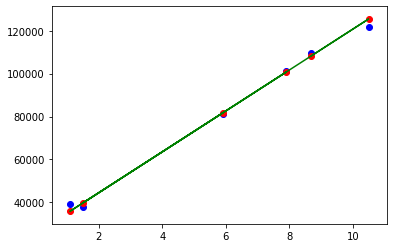

In [20]:
plt.scatter(xtest,ytest,color="blue")
plt.scatter(xtest,ypred,color="red")
plt.plot(xtest,ypred,color="green")
plt.show()

In [21]:
r2_scores = []
for i in range(1,500):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=i)
    model = LinearRegression()
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    r2 = r2_score(ytest,ypred)
    r2_scores.append(r2)

In [22]:
r2_scores

[0.7616681465472094,
 0.8886956733784562,
 0.9695039421049821,
 0.9504404484884268,
 0.9439628569611375,
 0.9368146227107088,
 0.8143022783109007,
 0.9631182154839476,
 0.9388416537799072,
 0.9816423482070253,
 0.940882728477622,
 0.9429269163491424,
 0.9394460269118793,
 0.9606215790278543,
 0.8697012433817218,
 0.7949890249259295,
 0.9384744808306155,
 0.8864330645841889,
 0.9415531751862448,
 0.9441299149555877,
 0.9398582853702571,
 0.8870702615446784,
 0.9184170849214232,
 0.9520702017424296,
 0.9531732818427658,
 0.9835849730044816,
 0.9636425773684422,
 0.9217841352107623,
 0.9467172742609804,
 0.9944092048209745,
 0.8967649524853983,
 0.8985995727228404,
 0.9350785573211586,
 0.9244141448042442,
 0.8839476512584652,
 0.955021106900739,
 0.9778242092591887,
 0.972479448737762,
 0.9928344802911049,
 0.7775083459037235,
 0.9802519469633169,
 0.9024461774180497,
 0.8688045158887867,
 0.934951117043928,
 0.9250487875802144,
 0.9789129767378081,
 0.98399193890564,
 0.980277279178695,

In [23]:
max(r2_scores)

0.9952429110093546

In [24]:
r2_scores.index(0.9944092048209745)

29